# "2019 June Portfolio BackTest"
> "2019 June portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [40]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [41]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [42]:
#hide_input
df_testp=df_testp[['Company Name','Date', 'Ticker', 'label',  'pred', 'prof0.0', 'prof-1.0',
       'prof1.0', 'return1&2', 'return1&2&3', 'return1&2&3&4', 'return2',
       'return1', 'return3', 'return4', 'cumulative_return1',
       'cumulative_return1&2', 'cumulative_return1&2&3',
       'cumulative_return1&2&3&4']].copy()

In [43]:
#hide
import datetime
datetoday=f"{datetime.datetime.now():%Y%m%d}"
dateyesterday=int(datetoday)-6;dateyesterday

20200423

In [44]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20190601].loc[df_testp.Date<20190701].sort_values(by='Date',ascending=True).copy().reset_index()

**Long-Short Portfolio**

In [45]:
#hide
#df_testp=df_testp.loc[df_testp.Date>=20200201].copy().reset_index()
df_testp['indexx']=range(len(df_testp))

In [46]:
#hide
df_testp['cumulative_return1']=0.0
df_testp['cumulative_return1&2']=0.0
df_testp['cumulative_return1&2&3']=0.0
df_testp['cumulative_return1&2&3&4']=0.0
for l in range(len(df_testp)):
  df_testp['cumulative_return1'][l]=np.prod(df_testp['return1'][:l])
  df_testp['cumulative_return1&2'][l]=np.prod(df_testp['return1&2'][:l])
  df_testp['cumulative_return1&2&3'][l]=np.prod(df_testp['return1&2&3'][:l])
  df_testp['cumulative_return1&2&3&4'][l]=np.prod(df_testp['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [47]:
#hide_input
df_testp

,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,return1&2,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,2417,MESA LABORATORIES INC /CO,20190603,MLAB,1.0,1.0,0.117199,0.345370,0.537431,1.099272,...,1.086762,1.034770,1.062335,0.983567,1.005137,1.000000,1.000000,1.000000,1.000000,0
1,2418,"ORGANOVO HOLDINGS, INC.",20190603,ONVO,-1.0,1.0,0.121535,0.368154,0.510311,0.857143,...,0.821429,0.888889,0.964286,0.916667,1.045455,1.062335,1.099272,1.081208,1.086762,1
2,2419,CAPITAL SOUTHWEST CORP,20190604,CSWC,1.0,1.0,0.175093,0.317151,0.507756,1.017185,...,1.013005,0.996360,1.020901,0.988584,1.007390,1.024394,0.942233,0.849520,0.892697,2
3,2420,Motors Liquidation Co,20190604,GM,1.0,1.0,0.140028,0.368015,0.491956,0.984887,...,1.007837,0.981864,1.003079,1.008525,1.014652,1.045805,0.958426,0.854255,0.904307,3
4,2421,"ORION ENERGY SYSTEMS, INC.",20190605,OESX,1.0,1.0,0.128632,0.352759,0.518609,1.063241,...,1.102767,0.896667,1.185771,1.033457,1.003597,1.049025,0.943941,0.848517,0.911394,4
5,2422,AMERICAN SUPERCONDUCTOR CORP /DE/,20190605,AMSC,-1.0,1.0,0.118939,0.352294,0.528767,0.821429,...,0.824405,0.996390,0.824405,0.993961,1.009721,1.243903,1.003637,0.932363,1.005055,5
6,2423,"ITERIS, INC.",20190606,ITI,-1.0,1.0,0.131552,0.369734,0.498715,0.955638,...,0.968577,0.953875,1.001848,1.009671,1.003831,1.025480,0.824416,0.761245,0.828572,6
7,2424,DAKTRONICS INC /SD/,20190607,DAKT,1.0,1.0,0.135599,0.344403,0.519997,1.011589,...,1.026490,0.980738,1.031457,0.998363,1.016393,1.027375,0.787843,0.734510,0.802535,7
8,2425,CORVEL CORP,20190607,CRVL,1.0,1.0,0.119039,0.283067,0.597894,1.027799,...,1.060875,1.010886,1.016731,1.026421,1.005612,1.059693,0.796973,0.741806,0.823795,8
9,2426,"Brownie's Marine Group, Inc",20190607,BWMG,0.0,1.0,0.122475,0.411001,0.466524,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.077423,0.819129,0.782572,0.873943,9


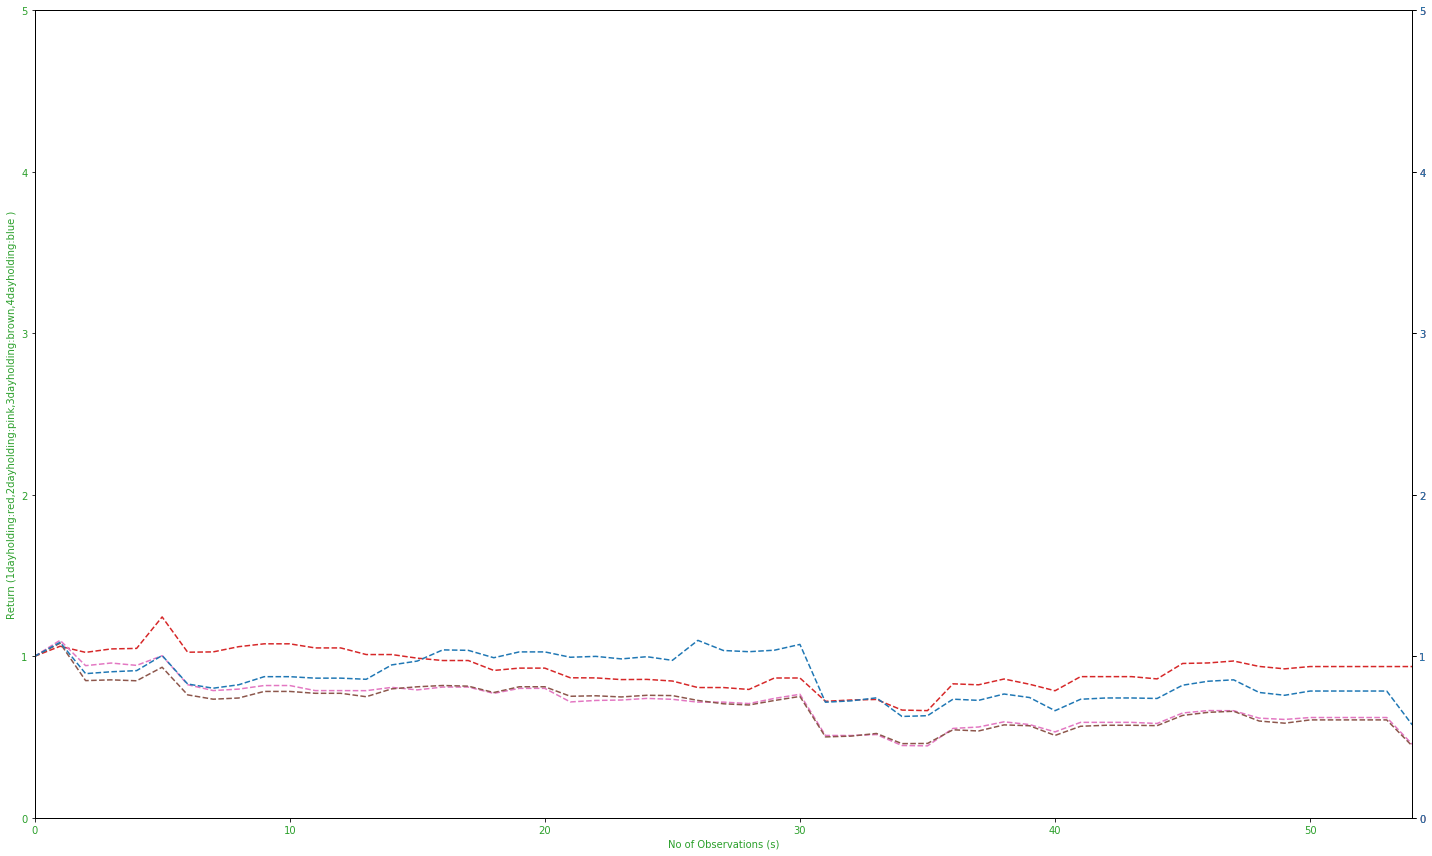

In [48]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_testp['indexx'], df_testp['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_testp['indexx'], df_testp['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_testp['indexx'], df_testp['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_testp['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)


fig.tight_layout()

**Long portfolio**

In [49]:
#hide_input
df_long=df_testp.copy()
df_long=df_long.loc[df_long.pred==1.0].sort_values(by='Date',ascending=True).reset_index()


In [50]:
#hide_input
df_long['indexx']=range(len(df_long))

In [51]:
#hide
df_long['cumulative_return1']=0.0
df_long['cumulative_return1&2']=0.0
df_long['cumulative_return1&2&3']=0.0
df_long['cumulative_return1&2&3&4']=0.0
for l in range(len(df_long)):
  df_long['cumulative_return1'][l]=np.prod(df_long['return1'][:l])
  df_long['cumulative_return1&2'][l]=np.prod(df_long['return1&2'][:l])
  df_long['cumulative_return1&2&3'][l]=np.prod(df_long['return1&2&3'][:l])
  df_long['cumulative_return1&2&3&4'][l]=np.prod(df_long['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [52]:
#hide_input
df_long

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,0,2417,MESA LABORATORIES INC /CO,20190603,MLAB,1.0,1.0,0.117199,0.345370,0.537431,...,1.086762,1.034770,1.062335,0.983567,1.005137,1.000000,1.000000,1.000000,1.000000,0
1,1,2418,"ORGANOVO HOLDINGS, INC.",20190603,ONVO,-1.0,1.0,0.121535,0.368154,0.510311,...,0.821429,0.888889,0.964286,0.916667,1.045455,1.062335,1.099272,1.081208,1.086762,1
2,2,2419,CAPITAL SOUTHWEST CORP,20190604,CSWC,1.0,1.0,0.175093,0.317151,0.507756,...,1.013005,0.996360,1.020901,0.988584,1.007390,1.024394,0.942233,0.849520,0.892697,2
3,3,2420,Motors Liquidation Co,20190604,GM,1.0,1.0,0.140028,0.368015,0.491956,...,1.007837,0.981864,1.003079,1.008525,1.014652,1.045805,0.958426,0.854255,0.904307,3
4,4,2421,"ORION ENERGY SYSTEMS, INC.",20190605,OESX,1.0,1.0,0.128632,0.352759,0.518609,...,1.102767,0.896667,1.185771,1.033457,1.003597,1.049025,0.943941,0.848517,0.911394,4
5,5,2422,AMERICAN SUPERCONDUCTOR CORP /DE/,20190605,AMSC,-1.0,1.0,0.118939,0.352294,0.528767,...,0.824405,0.996390,0.824405,0.993961,1.009721,1.243903,1.003637,0.932363,1.005055,5
6,6,2423,"ITERIS, INC.",20190606,ITI,-1.0,1.0,0.131552,0.369734,0.498715,...,0.968577,0.953875,1.001848,1.009671,1.003831,1.025480,0.824416,0.761245,0.828572,6
7,7,2424,DAKTRONICS INC /SD/,20190607,DAKT,1.0,1.0,0.135599,0.344403,0.519997,...,1.026490,0.980738,1.031457,0.998363,1.016393,1.027375,0.787843,0.734510,0.802535,7
8,8,2425,CORVEL CORP,20190607,CRVL,1.0,1.0,0.119039,0.283067,0.597894,...,1.060875,1.010886,1.016731,1.026421,1.005612,1.059693,0.796973,0.741806,0.823795,8
9,9,2426,"Brownie's Marine Group, Inc",20190607,BWMG,0.0,1.0,0.122475,0.411001,0.466524,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.077423,0.819129,0.782572,0.873943,9


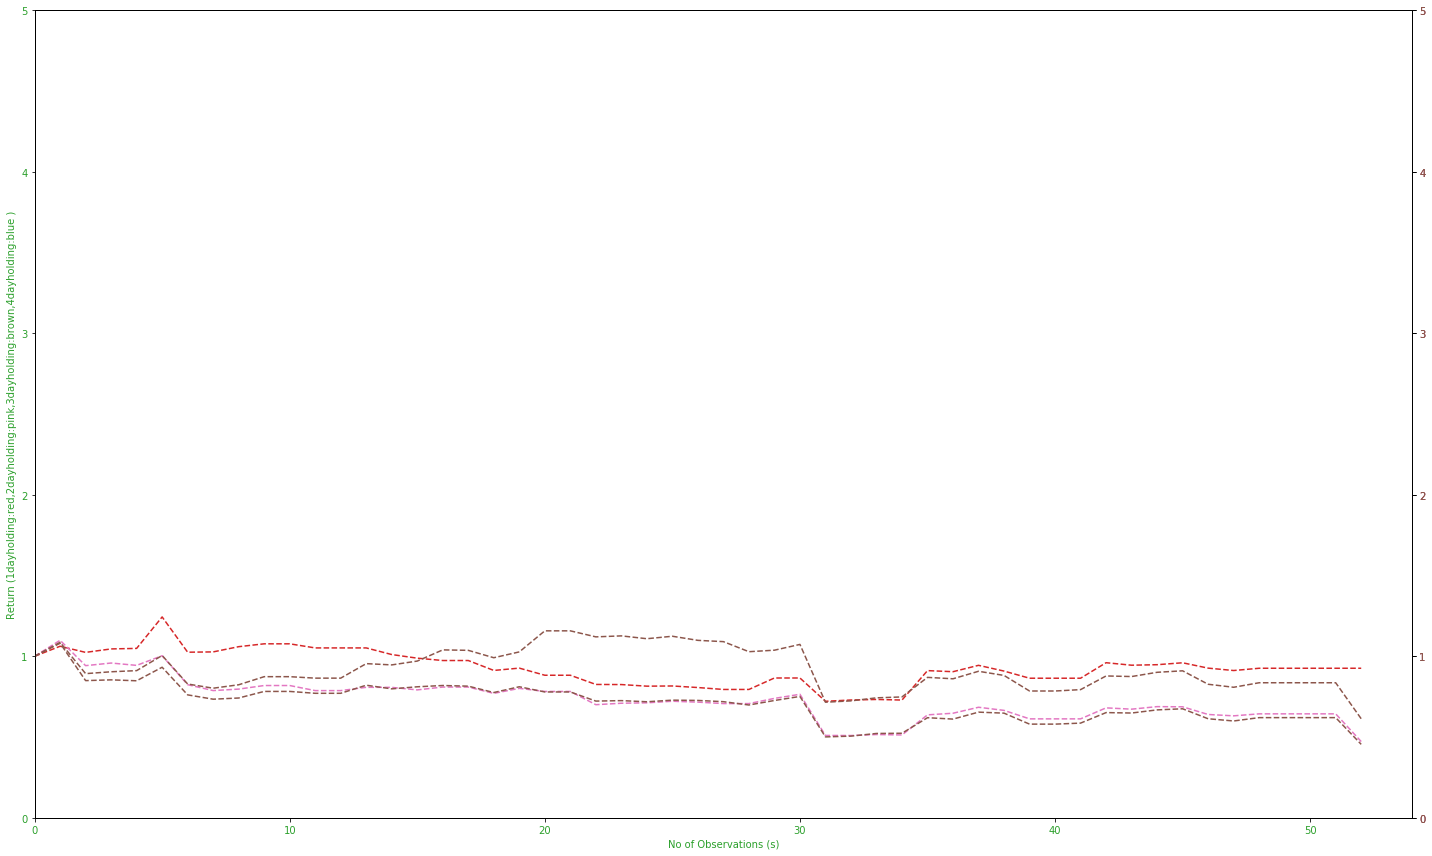

In [53]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_long['indexx'], df_long['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_long['indexx'], df_long['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_long['indexx'], df_long['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_long['indexx'], df_long['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5

a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_long['indexx'].min(),df_testp['indexx'].max()
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()

**Short Portfolio**

In [54]:
#hide_input
df_short=df_testp.copy()
df_short=df_short.loc[df_short.pred==-1.0].sort_values(by='Date',ascending=True).reset_index()

In [55]:
#hide_input
df_short['indexx']=range(len(df_short))

In [56]:
#hide
df_short['cumulative_return1']=0.0
df_short['cumulative_return1&2']=0.0
df_short['cumulative_return1&2&3']=0.0
df_short['cumulative_return1&2&3&4']=0.0
for l in range(len(df_short)):
  df_short['cumulative_return1'][l]=np.prod(df_short['return1'][:l])
  df_short['cumulative_return1&2'][l]=np.prod(df_short['return1&2'][:l])
  df_short['cumulative_return1&2&3'][l]=np.prod(df_short['return1&2&3'][:l])
  df_short['cumulative_return1&2&3&4'][l]=np.prod(df_short['return1&2&3&4'][:l])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launc

In [57]:
#hide_input
df_short

,level_0,index,Company Name,Date,Ticker,label,pred,prof0.0,prof-1.0,prof1.0,...,return1&2&3&4,return2,return1,return3,return4,cumulative_return1,cumulative_return1&2,cumulative_return1&2&3,cumulative_return1&2&3&4,indexx
0,33,2450,MEXCO ENERGY CORP,20190624,MXC,1.0,-1.0,0.167688,0.418866,0.413446,...,0.844783,0.953804,0.910275,1.012987,0.960526,1.000000,1.000000,1.0000,1.000000,0
1,44,2469,"Empire Global Gaming, Inc.",20190628,EPGG,-1.0,-1.0,0.157263,0.446289,0.396448,...,1.111111,1.000000,1.111111,1.000000,1.000000,0.910275,0.868225,0.8795,0.844783,1


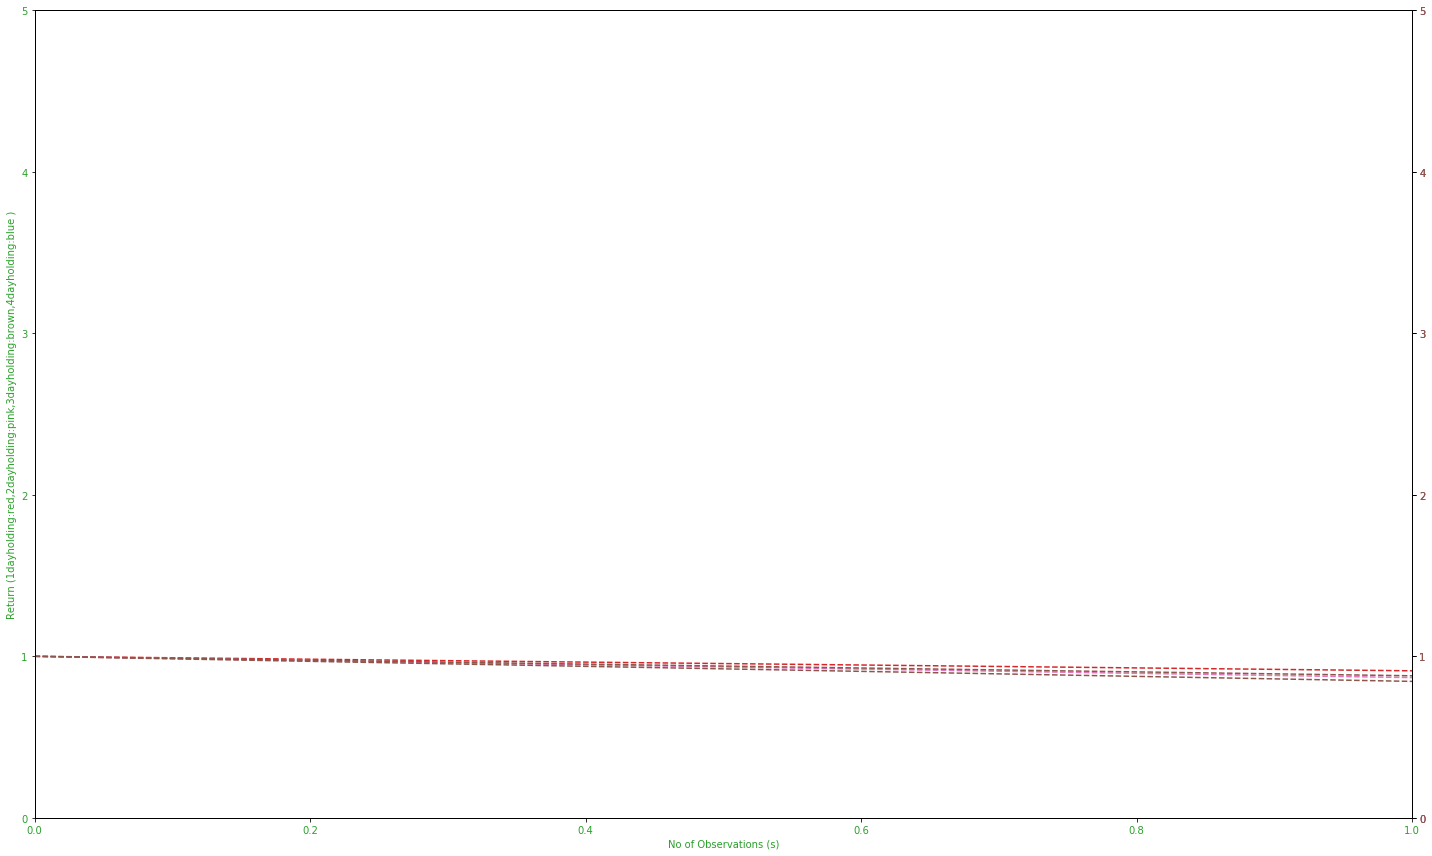

In [58]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_short['indexx'], df_short['cumulative_return1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(df_short['indexx'], df_short['cumulative_return1&2'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)

a3 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a3.plot(df_short['indexx'], df_short['cumulative_return1&2&3'], color=color,linestyle='--')
a3.tick_params(axis='y', labelcolor=color)

a4 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:brown'
#a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a4.plot(df_short['indexx'], df_short['cumulative_return1&2&3&4'], color=color,linestyle='--')
a4.tick_params(axis='y', labelcolor=color)

a,b = 0,5
a1.set_ylim(a,b)
a2.set_ylim(a,b)
a3.set_ylim(a,b)
a4.set_ylim(a,b)

x,y =df_short['indexx'].min(),df_short['indexx'].max()
#x,y=0,10
a1.set_xlim(x,y)
a2.set_xlim(x,y)
a3.set_xlim(x,y)
a4.set_xlim(x,y)

fig.tight_layout()